<a href="https://colab.research.google.com/github/azimjaan21/home_price_prediction_ml_p1/blob/main/ml_1home_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 1. Business Understanding
It all begins with identifying the problem we want to solve. Whether it's predicting customer churn or classifying images, understanding the business context sets the foundation.

#📊 2. Analytic Approach

In [ ]:
import pandas as pd
import numpy as np
import sklearn  #ml lib in Python
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

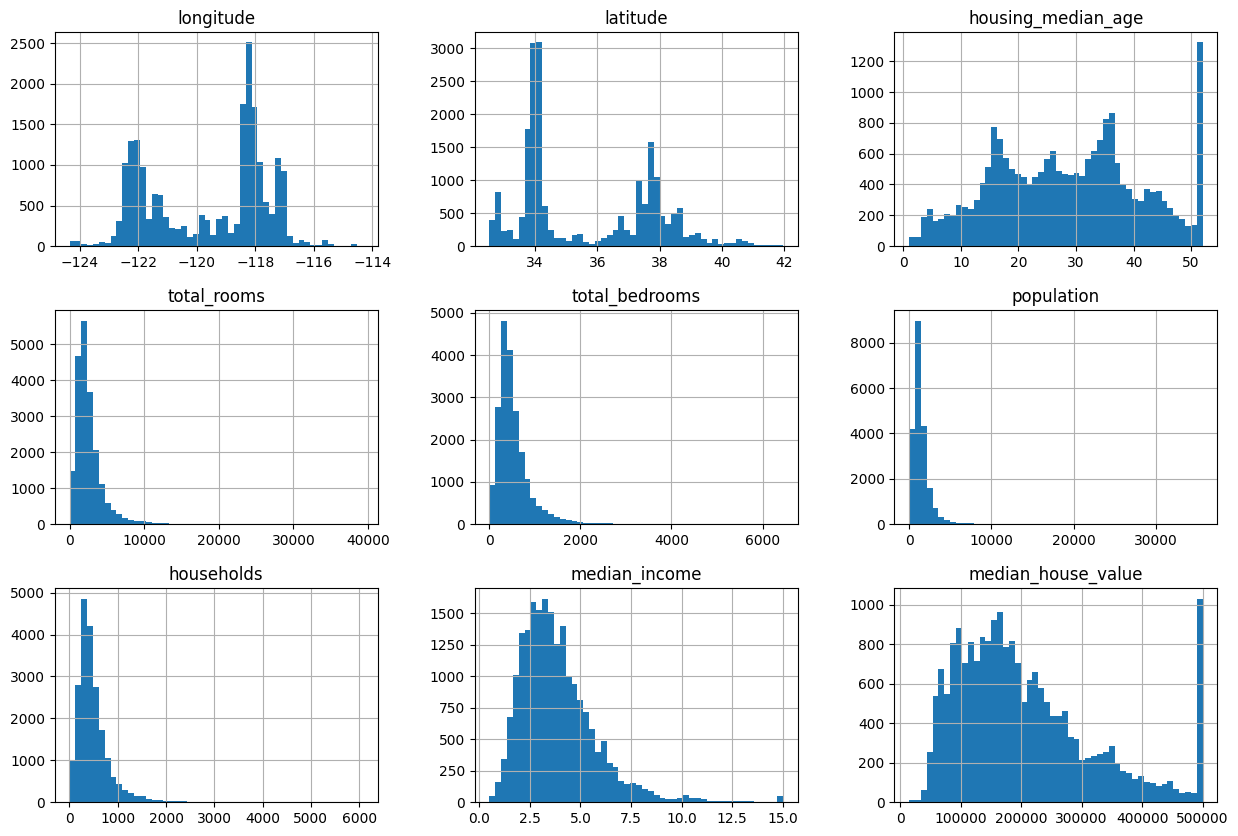

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(15,10))
plt.show()



---


# **Train / Test set**
---


In [30]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=21)
#random_state(it is crucial to select data randomly, and avoiding to read whole data by ML model)

**Test set**

In [ ]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18726    -122.30     40.58                19.0       1043.0           204.0   
1046     -120.72     38.38                 9.0       1787.0           347.0   
15508    -117.08     33.14                11.0       1430.0           292.0   
828      -122.08     37.62                27.0       1826.0           309.0   
19007    -121.98     38.36                33.0       1083.0           217.0   
...          ...       ...                 ...          ...             ...   
17027    -122.29     37.51                35.0       3040.0           520.0   
19373    -120.90     37.81                27.0       4213.0           750.0   
6129     -117.99     34.08                11.0       2399.0           527.0   
5466     -118.47     33.99                50.0       1568.0           501.0   
17547    -121.88     37.34                52.0        867.0           232.0   

       population  households  median_income  median_house_value  \
18726       505.0       183.0         1.6033             98800.0   
1046        806.0       306.0         2.5250            157200.0   
15508       921.0       294.0         4.2357            160900.0   
828        1016.0       313.0         5.6400            206500.0   
19007       562.0       203.0         2.4330            101700.0   
...           ...         ...            ...                 ...   
17027      1374.0       518.0         6.1004            426400.0   
19373      2142.0       746.0         3.7031            173300.0   
6129       2307.0       531.0         3.5625            141000.0   
5466        764.0       478.0         3.0150            414300.0   
17547      1264.0       227.0         2.6312            302900.0   

      ocean_proximity  
18726          INLAND  
1046           INLAND  
15508       <1H OCEAN  
828          NEAR BAY  
19007          INLAND  
...               ...  
17027      NEAR OCEAN  
19373          INLAND  
6129           INLAND  
5466        <1H OCEAN  
17547       <1H OCEAN  

[4128 rows x 10 columns]

**Train set**

In [ ]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12055    -117.57     33.88                39.0        679.0           164.0   
10018    -121.20     39.23                 9.0       2802.0           447.0   
3794     -118.37     34.16                40.0       1973.0           382.0   
162      -122.24     37.81                52.0       2513.0           502.0   
13436    -117.44     34.09                24.0       3477.0           831.0   
...          ...       ...                 ...          ...             ...   
16432    -121.23     38.12                22.0        393.0            58.0   
8964     -118.39     33.99                43.0        612.0           135.0   
5944     -117.88     34.13                33.0       3713.0           718.0   
5327     -118.45     34.04                22.0       3319.0          1045.0   
15305    -117.37     33.19                23.0       4104.0          1274.0   

       population  households  median_income  median_house_value  \
12055       769.0       179.0         2.3036            110600.0   
10018       955.0       418.0         5.2359            213300.0   
3794        774.0       352.0         4.4122            282300.0   
162        1048.0       518.0         3.6750            269900.0   
13436      2541.0       753.0         2.3682             97400.0   
...           ...         ...            ...                 ...   
16432       134.0        57.0         3.9500            178100.0   
8964        402.0       142.0         5.1322            314900.0   
5944       2106.0       720.0         4.0023            185500.0   
5327       1848.0       940.0         3.6673            283300.0   
15305      4729.0      1187.0         1.8214            173800.0   

      ocean_proximity  
12055          INLAND  
10018          INLAND  
3794        <1H OCEAN  
162          NEAR BAY  
13436          INLAND  
...               ...  
16432          INLAND  
8964        <1H OCEAN  
5944        <1H OCEAN  
5327        <1H OCEAN  
15305      NEAR OCEAN  

[16512 rows x 10 columns]

In [ ]:
housing = train_set.copy()

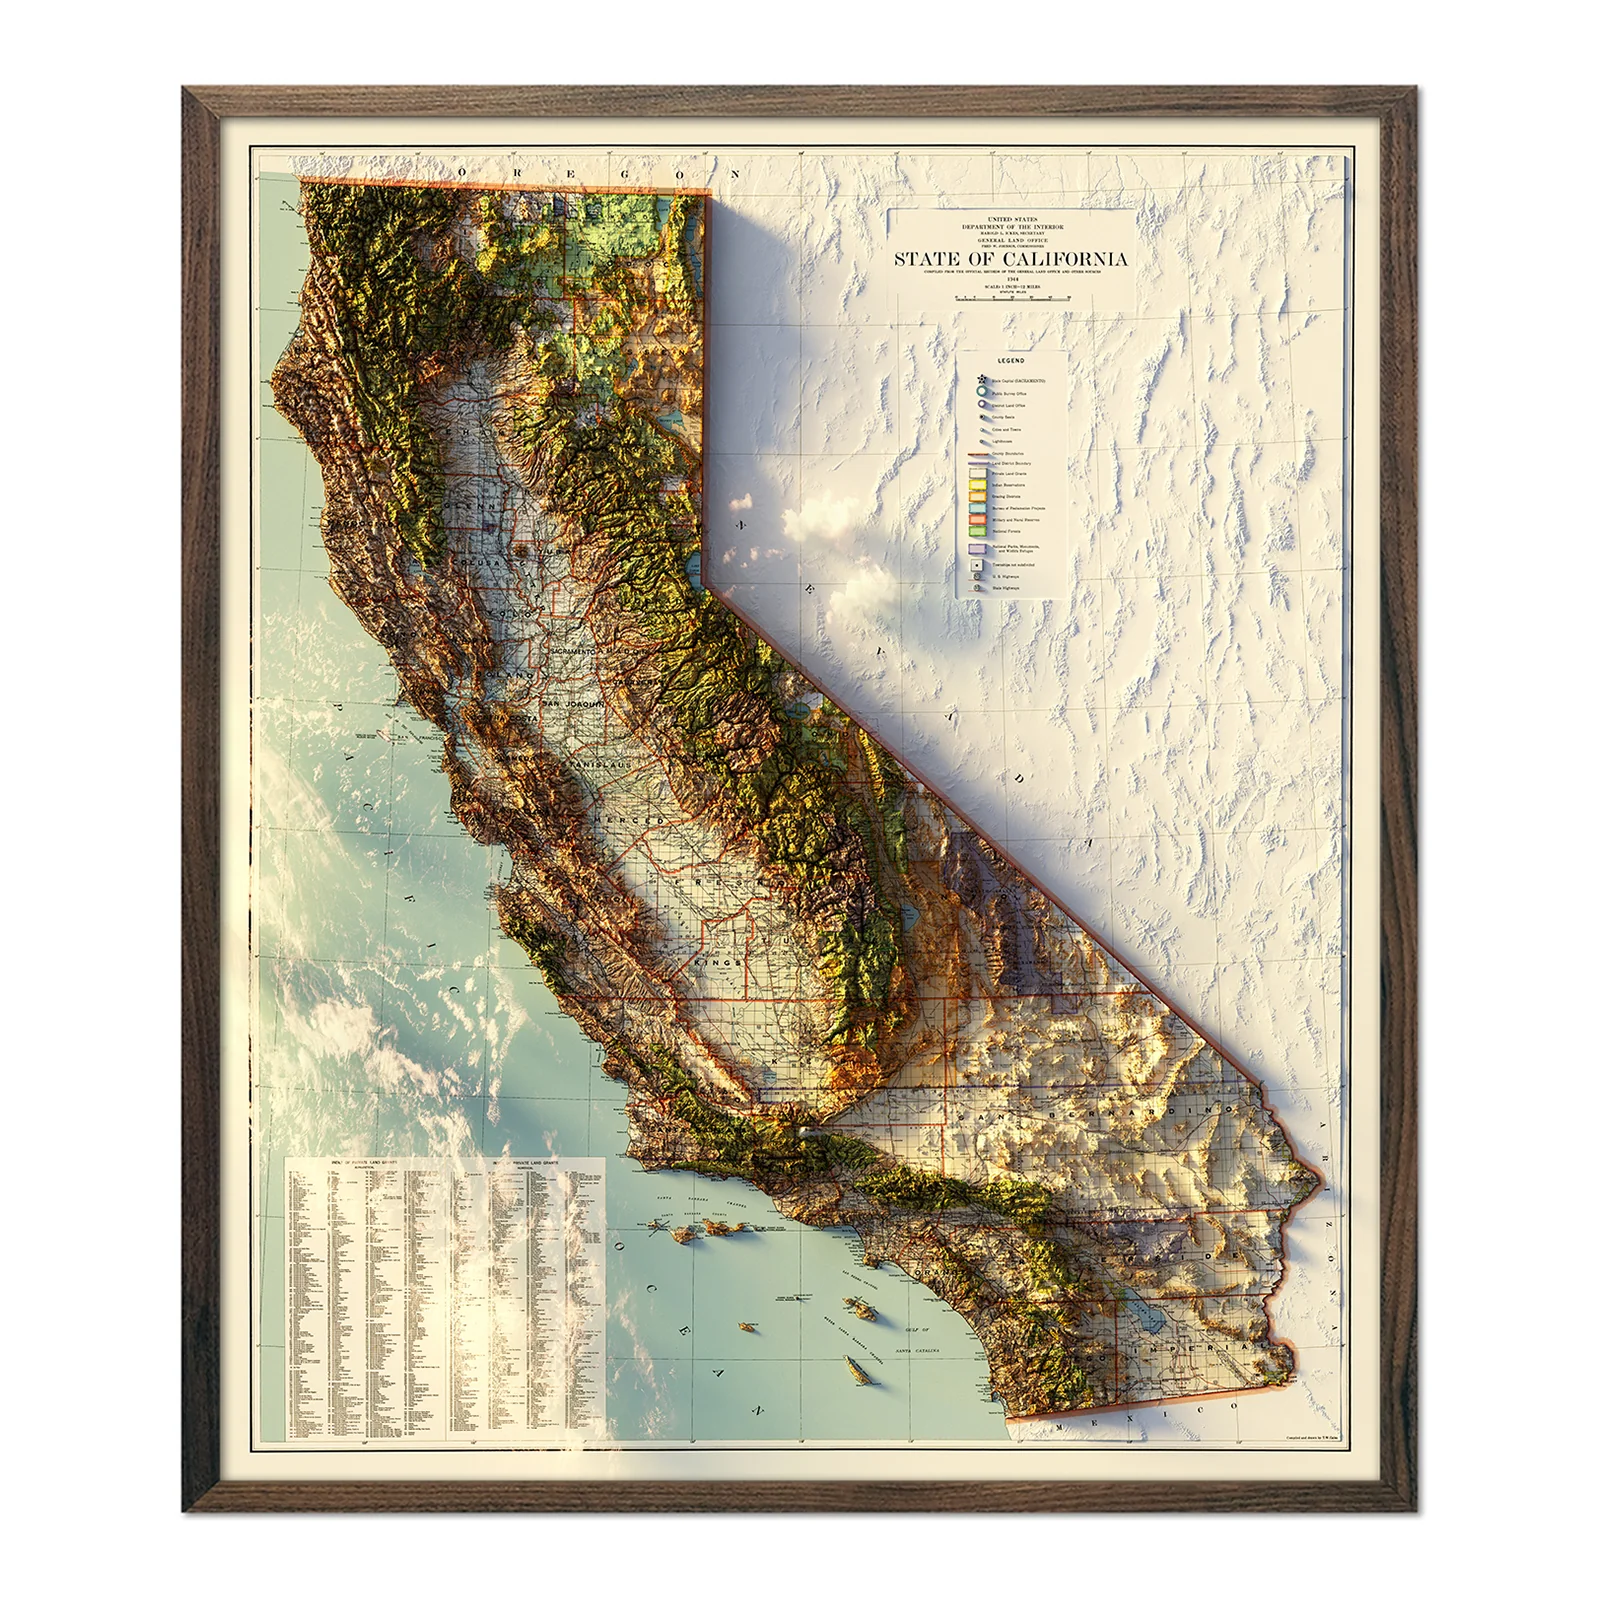

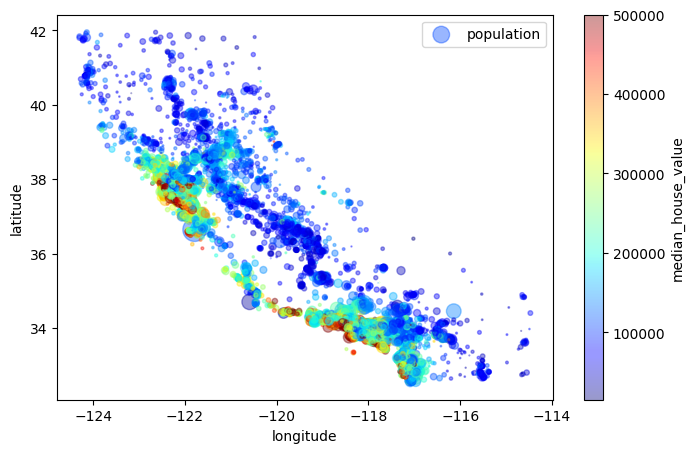

In [21]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,
    label="population",
    figsize=(8, 5),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
)
plt.show()

Let's check **correlation of other values** with ***'median_house_value'***




In [33]:
# Convert the 'ocean_proximity' column to numerical values using one-hot encoding
housing = pd.get_dummies(housing, columns=['ocean_proximity'])
housing.corr()["median_house_value"].sort_values(ascending=False)


median_house_value            1.000000
median_income                 0.689804
ocean_proximity_<1H OCEAN     0.251951
ocean_proximity_NEAR BAY      0.160282
ocean_proximity_NEAR OCEAN    0.145097
total_rooms                   0.136088
housing_median_age            0.106616
households                    0.066740
total_bedrooms                0.049483
ocean_proximity_ISLAND        0.026234
population                   -0.023716
longitude                    -0.045935
latitude                     -0.144006
ocean_proximity_INLAND       -0.483132
Name: median_house_value, dtype: float64

Now, we will analyze near values to **median_house_value**

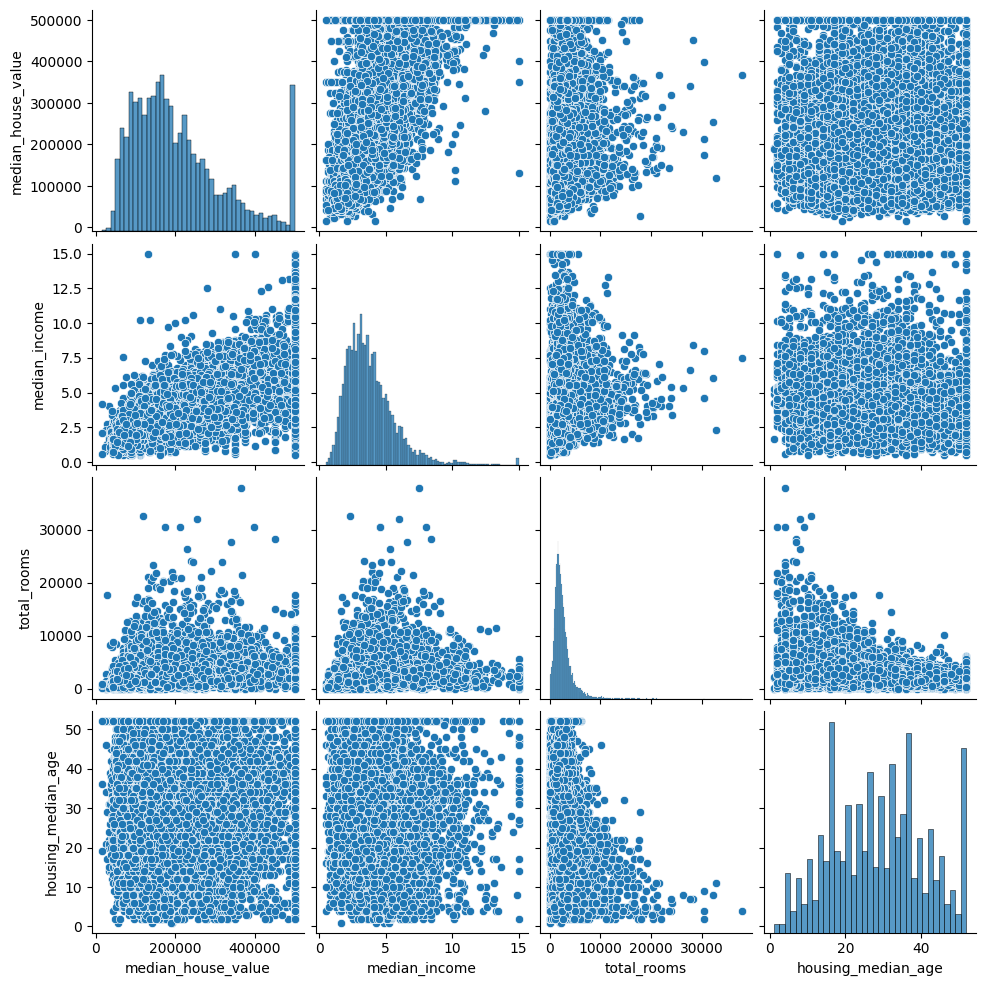

In [35]:
columns = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(housing[columns])
plt.show()

**Conclusion**


---
*'median_house_value'* and *'median_income'* have the nearest correlation after analyzing charts.


---




###############################################################



---

**Let's see the correlation between two values in one scatter graph!**


---



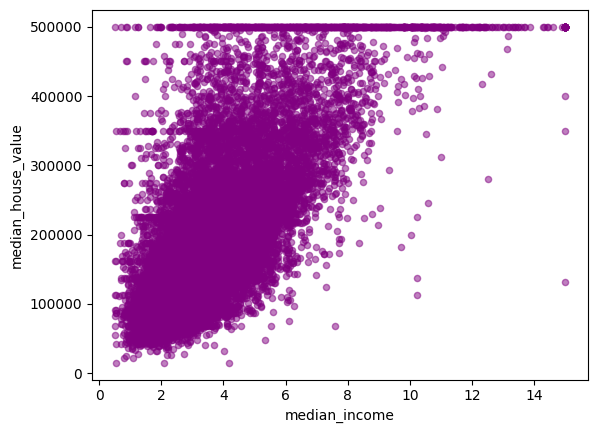

In [41]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.5, color = 'purple')
plt.show()